In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
from sklearn import svm

1.1 Linear SVM

In [2]:
data = sio.loadmat('./data/ex6data1.mat')

In [3]:
X = data['X']
y = data['y']
y = y.reshape(len(y))

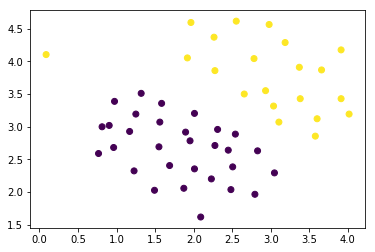

In [4]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y)
plt.show()

C parameter is a positive value that controls the penalty for misclassified training examples. A large C parameter tells the SVM to try to classify all the examples correctly

In [5]:
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)
print(clf.predict([[2., 2.]]))
print(clf.predict([[4., 4.]]))

[0]
[1]


In [6]:
# get support vectors
print(clf.support_vectors_)

# get indices of support vectors
print(clf.support_)

# get number of support vectors for each class
print(clf.n_support_)

[[1.5841   3.3575  ]
 [2.0103   3.2039  ]
 [2.3099   2.9584  ]
 [2.8283   2.6309  ]
 [1.3191   3.5109  ]
 [2.5403   2.8867  ]
 [3.5772   2.856   ]
 [3.1048   3.0709  ]
 [1.9182   4.0534  ]
 [2.6555   3.5008  ]
 [3.0357   3.3165  ]
 [0.086405 4.1045  ]]
[20 21 24 25 42 47  4 11 12 14 19 50]
[6 6]


In [7]:
w = clf.coef_
b = clf.intercept_
xp = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100)
yp = - (w[:,0]*xp + b)/w[:,1]

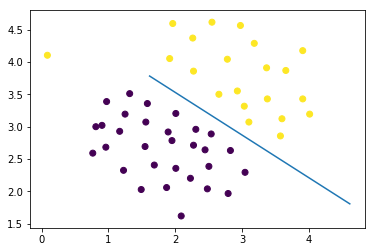

In [8]:
fig, ax = plt.subplots()
ax.plot(xp, yp)
ax.scatter(X[:,0], X[:,1], c=y)
plt.show()

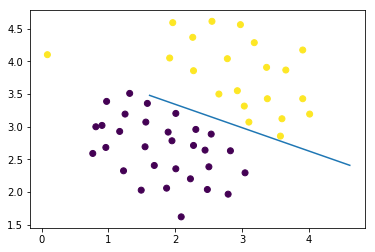

In [9]:
clf = svm.SVC(kernel='linear', C=100)
clf.fit(X, y)
w = clf.coef_
b = clf.intercept_
xp = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 1000)
yp = - (w[:,0]*xp + b)/w[:,1]
fig, ax = plt.subplots()
ax.plot(xp, yp)
ax.scatter(X[:,0], X[:,1], c=y)
plt.show()

1.2 SVM with Gaussian Kernels

In [43]:
data = sio.loadmat('./data/ex6data2.mat')

In [44]:
X = data['X']
y = data['y']
y = y.reshape(len(y))

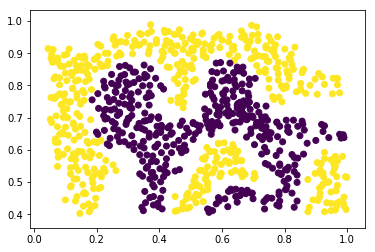

In [45]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y)
plt.show()

C parameter is a positive value that controls the penalty for misclassified training examples. A large C parameter tells the SVM to try to classify all the examples correctly

In [46]:
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)
print(clf.predict([[2., 2.]]))
print(clf.predict([[4., 4.]]))

[1]
[1]


In [47]:
w = clf.coef_
b = clf.intercept_
xp = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100)
yp = - (w[:,0]*xp + b)/w[:,1]

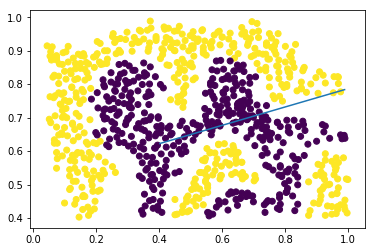

In [48]:
fig, ax = plt.subplots()
ax.plot(xp, yp)
ax.scatter(X[:,0], X[:,1], c=y)
plt.show()

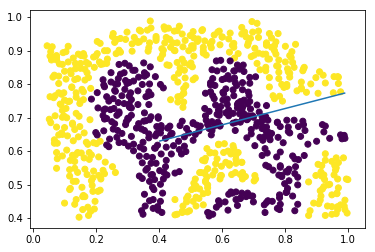

In [49]:
clf = svm.SVC(kernel='linear', C=100)
clf.fit(X, y)
w = clf.coef_
b = clf.intercept_
xp = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 1000)
yp = - (w[:,0]*xp + b)/w[:,1]
fig, ax = plt.subplots()
ax.plot(xp, yp)
ax.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [52]:
print(clf.predict([[0.4, 0.]]))
print(clf.predict([[4., 4.]]))

[0]
[1]


Linear SVM does not work well on unlinear data.  
Trick is to use Kernel

In [53]:
clf = svm.SVC(kernel='rbf', gamma=2, C=1)
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

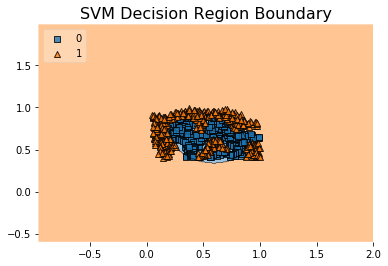

In [78]:
from mlxtend.plotting import plot_decision_regions

clf = svm.SVC(decision_function_shape='ovo', kernel='rbf', gamma=2, C=1)
clf.fit(X, y) 

# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X, 
                      y=y,
                      clf=clf, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.title('SVM Decision Region Boundary', size=16)
plt.show()

I should take the time to learn about grid search and implementing my own kernel in scikit, maybe later :)

and solve this plotting issue..